# Depletion fold-change scaling

## Import datasets

In [1]:
import copy
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

df1 = pd.read_csv('../results/library-independent_RTs/data_scaling/positive_controls.tsv', sep='\t')
df2 = pd.read_csv('../results/library-independent_RTs/data_scaling/genome-wide.tsv', sep='\t')

## Plots

Jaccard similarity scores between essential gene-sets called post scaling the DEMETER dataset with the whole reference gene-sets and the MinTEs 5% reduced templates (RTs), respectively:

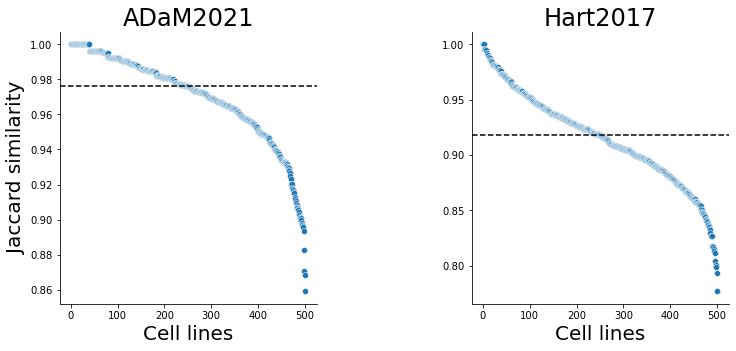

In [3]:
medians = df1.groupby(['gset', 'source']).median() 

df1_1 = copy.deepcopy(df1)
df1_1 = df1_1[df1_1['source'] == 'DEMETER2']

g = sns.FacetGrid(data = df1_1, col = 'gset', row = 'source', gridspec_kws={"wspace":0.6, "hspace":0.4},
            height = 5, aspect = 1.2, margin_titles=True, sharey=False, sharex=False)
g.map(sns.scatterplot, 'model_name', '0.05')
g.axes[0,0].set_xlabel('Cell lines', size=20)
g.axes[0,1].set_xlabel('Cell lines', size=20)
g.axes[0,0].set_ylabel('Jaccard similarity', size=20)
g.axes[0,0].axhline(medians['0.05'][1], color='black', linestyle='--') 
g.axes[0,1].axhline(medians['0.05'][4], color='black', linestyle='--')
g.set_titles(col_template="{col_name}", row_template="", size=24)

for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=24)
    ax.tick_params(axis='both', colors='black', reset=True, direction='out', top=False, right=False)

Jaccard similarity scores between essential gene-sets called post scaling the training datasets with the whole reference gene-sets and the MinTEs 5% RTs, respectively:

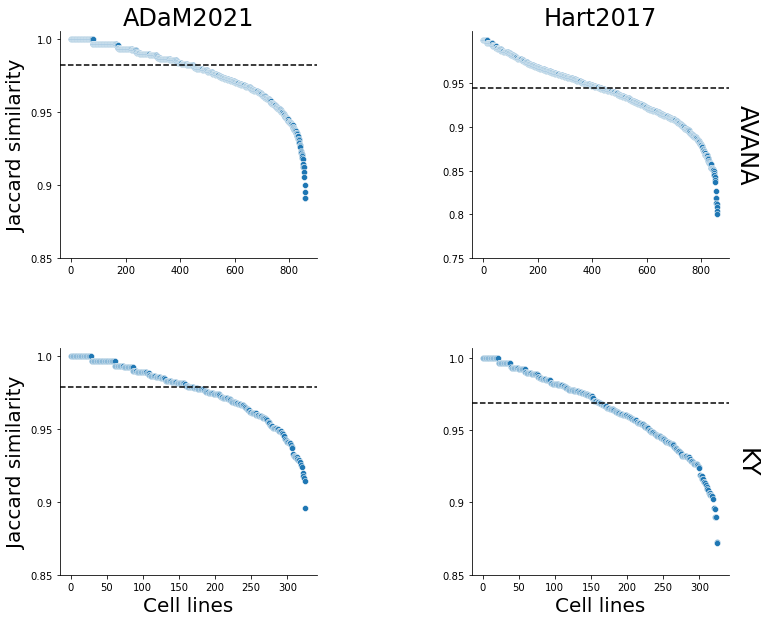

In [5]:
df1_2 = copy.deepcopy(df1)
df1_2 = df1_2[(df1_2['source'] == 'AVANA') | (df1_2['source'] == 'KY')]

g = sns.FacetGrid(data = df1_2, col = 'gset', row = 'source', gridspec_kws={"wspace":0.6, "hspace":0.4},
            height = 5, aspect = 1.2, margin_titles=True, sharey=False, sharex=False)
g.map(sns.scatterplot, 'model_name', '0.05')
g.axes[1,0].set_xlabel('Cell lines', size=20)
g.axes[1,1].set_xlabel('Cell lines', size=20)
g.axes[0,0].set_ylabel('Jaccard similarity', size=20)
g.axes[1,0].set_ylabel('Jaccard similarity', size=20)
g.axes[0,0].axhline(medians['0.05'][0], color='black', linestyle='--') 
g.axes[0,1].axhline(medians['0.05'][3], color='black', linestyle='--') 
g.axes[1,0].axhline(medians['0.05'][2], color='black', linestyle='--') 
g.axes[1,1].axhline(medians['0.05'][5], color='black', linestyle='--')
g.set_titles(col_template="{col_name}", row_template="{row_name}", size=24)

for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=24)
    ax.tick_params(axis='both', colors='black', reset=True, direction='out', top=False, right=False)

for i in range(2):
    for j in range(2):
        y_axis = g.axes[i,j].get_yticks()
        y_init = np.round(np.floor(y_axis[0]/0.05)*0.05, decimals=2)
        y_dist = np.arange(y_init, 1, 0.05)
        y_axis = np.round(y_dist, decimals=2)

        g.axes[i,j].set_yticks(y_axis)
        g.axes[i,j].set_yticklabels(y_axis)

g.set_titles(col_template="{col_name}", row_template="{row_name}", size=24)

Jaccard similarity scores between all of the fitness genes called post scaling the DEMETER and training datasets with the whole reference gene-sets and the MinTEs 5% RTs, respectively:

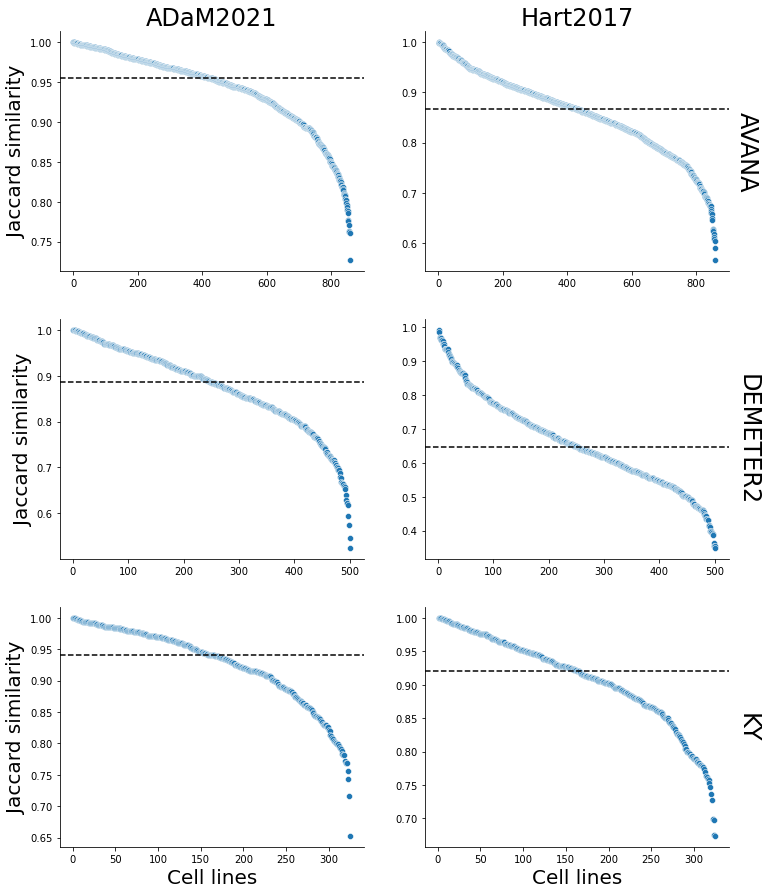

In [6]:
medians = df2.groupby(['gset', 'source']).median()

g = sns.FacetGrid(data = df2, col = 'gset', row = 'source', gridspec_kws={"wspace":0.2, "hspace":0.2},
            height = 5, aspect = 1.2, margin_titles=True, sharey=False, sharex=False)
g.map(sns.scatterplot, 'model_name', '0.05')
g.axes[0,0].set_ylabel('Jaccard similarity', size=20)
g.axes[1,0].set_ylabel('Jaccard similarity', size=20)
g.axes[2,0].set_ylabel('Jaccard similarity', size=20)
g.axes[2,0].set_xlabel('Cell lines', size=20)
g.axes[2,1].set_xlabel('Cell lines', size=20)
g.axes[0,0].axhline(medians['0.05'][0], color='black', linestyle='--') 
g.axes[0,1].axhline(medians['0.05'][3], color='black', linestyle='--') 
g.axes[1,0].axhline(medians['0.05'][1], color='black', linestyle='--') 
g.axes[1,1].axhline(medians['0.05'][4], color='black', linestyle='--')
g.axes[2,0].axhline(medians['0.05'][2], color='black', linestyle='--') 
g.axes[2,1].axhline(medians['0.05'][5], color='black', linestyle='--')
g.set_titles(col_template="{col_name}", row_template="{row_name}", size=24)

for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=24)
    ax.tick_params(axis='both', colors='black', reset=True, direction='out', top=False, right=False)